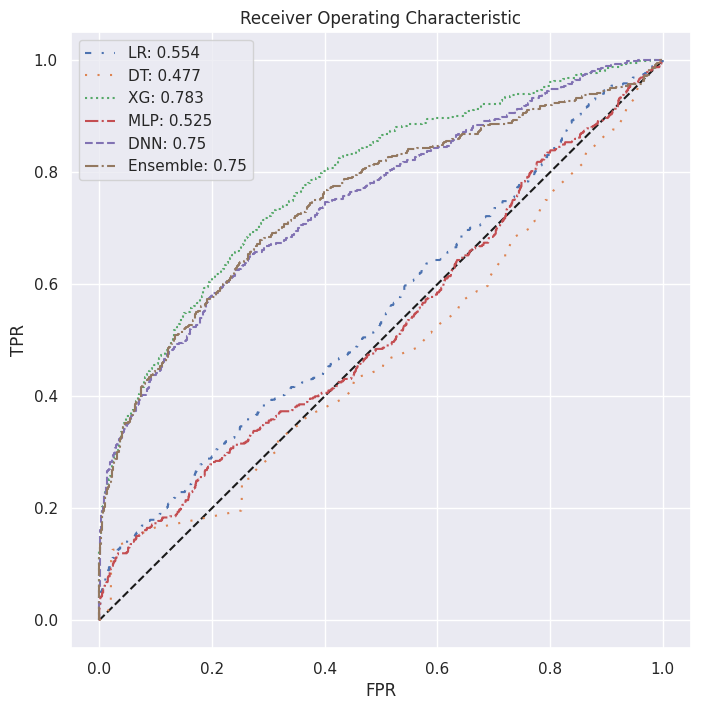

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score

res = pd.read_excel("model_performances_use-target_sub.xlsx", engine="openpyxl")

fpr1 , tpr1, thresholds1 = roc_curve(res['label'], res['Score_lr'])
auc1 = roc_auc_score(res['label'], res['Score_lr']).round(3)

fpr2 , tpr2, thresholds2 = roc_curve(res['label'], res['Score_dt'])
auc2 = roc_auc_score(res['label'], res['Score_dt']).round(3)

fpr3 , tpr3, thresholds3 = roc_curve(res['label'], res['Score_xgboost'])
auc3 = roc_auc_score(res['label'], res['Score_xgboost']).round(3)

fpr4 , tpr4, thresholds4 = roc_curve(res['label'], res['Score_mlp'])
auc4 = roc_auc_score(res['label'], res['Score_mlp']).round(3)

fpr5 , tpr5, thresholds5 = roc_curve(res['label'], res['Score_dnn'])
auc5 = roc_auc_score(res['label'], res['Score_dnn']).round(3)

fpr6 , tpr6, thresholds5 = roc_curve(res['label'], res['Score_ensemble'])
auc6 = roc_auc_score(res['label'], res['Score_ensemble']).round(3)

sns.set_theme()

linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 5))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 5, 1, 5))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

plt.figure(figsize=(8, 8))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= f"LR: {auc1}", linestyle=linestyle_tuple[7][1])
plt.plot(fpr2, tpr2, label= f"DT: {auc2}", linestyle=linestyle_tuple[0][1])
plt.plot(fpr3, tpr3, label= f"XG: {auc3}", linestyle=":")
plt.plot(fpr4, tpr4, label= f"MLP: {auc4}", linestyle="-.")
plt.plot(fpr5, tpr5, label= f"DNN: {auc5}", linestyle="--")
plt.plot(fpr6, tpr6, label= f"Ensemble: {auc6}", linestyle="-.")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

In [4]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

def print_metrics(label, prob, model_name):
    pred = prob.map(lambda x: 1 if x >= 0.5 else 0)
    
    auc = roc_auc_score(label, prob).round(4)
    f1 = f1_score(label, pred).round(4)
    precision = precision_score(label, pred).round(4)
    recall = recall_score(label, pred).round(4)
    
    print(model_name, "\t", auc, "\t", f1, "\t", precision, "\t", recall)

print("Name\tAUROC\t\tF1\t\tPrecision\tRecall")
print_metrics(res['label'], res['Score_lr'], "LR")
print_metrics(res['label'], res['Score_dt'], "DT")
print_metrics(res['label'], res['Score_mlp'], "MLP")
print_metrics(res['label'], res['Score_dnn'], "DNN")
print_metrics(res['label'], res['Score_xgboost'], "XGB")
print_metrics(res['label'], res['Score_ensemble'], "Ens")


Name	AUROC		F1		Precision	Recall
LR 	 0.5539 	 0.3836 	 0.2373 	 1.0
DT 	 0.4773 	 0.3836 	 0.2373 	 1.0
MLP 	 0.5249 	 0.3836 	 0.2373 	 1.0
DNN 	 0.7502 	 0.4526 	 0.7207 	 0.3299
XGB 	 0.7832 	 0.4425 	 0.7299 	 0.3175
Ens 	 0.7501 	 0.3794 	 0.2365 	 0.9588
